# Discounted Cash Flow (DCF) model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

discounted Rate Beta is:  0.07
Intrinsic Value per share is:  413.73


Discount: 30.0%


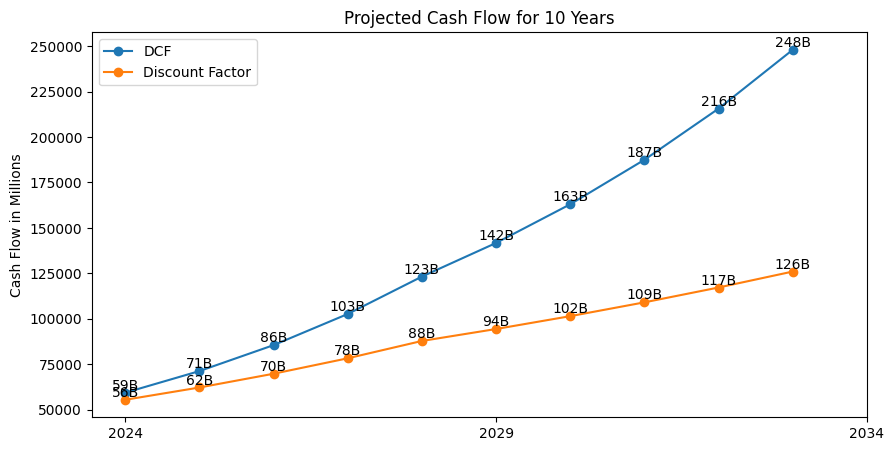

In [2]:

# calculate discount rate form beta
def cal_discountRate(n):
    beta_values = {0: 5.0, 1: 6.0, 1.1: 6.5, 1.2: 7.0, 1.3: 7.5, 1.4: 8.0, 1.5: 8.5, 1.6: 9.0}
    return beta_values.get(n, 10.0)
    
# User inputs
ticker = 'META'
cashFlow = 49540.00
totalDebt = 37630.00  #short term debt + long term debt
cashAndSTinvestment = 58200.00
cashFlowGrowthRate5Years = 20.00
GrowthRateNext10Years = 15.00
GrowthRateNext20Years = 5.00
outstandingShares = 2210
beta = 1.21
currentYear = 2024

option20Years = False
period = 10
if option20Years:
    period = 20

discountRate = cal_discountRate(round(beta,1))/100 #convert to decimal
print("discounted Rate Beta is: ", discountRate)

## Calculate the DCF
def modelDCF(cashFlow,cashFlowGrowthRate5Years,GrowthRateNext10Years,option20Years,GrowthRateNext20Years):
    #initalzie 
    projected = cashFlow
    discountFactor = 0
    
    df = pd.DataFrame(index=range(0,period),columns=['year','projected_CF','dis_Value'])
    df['year'] = range(currentYear,currentYear+period)
    
    #calculate the DCF
    cashFlowProjected =[]
    discountValue = []
    for i in range(1,6):
        projected = projected+(projected*cashFlowGrowthRate5Years)
        cashFlowProjected.append(projected)
        discountFactor = projected/((1+discountRate)**i)
        discountValue.append(discountFactor)
    for i in range(6,11):
        projected = projected+(projected*GrowthRateNext10Years)
        cashFlowProjected.append(projected)
        discountFactor = projected/((1+discountRate)**i)
        discountValue.append(discountFactor)
    if option20Years:
        for i in range(11,21):
            projected = projected+(projected*GrowthRateNext20Years)
            cashFlowProjected.append(projected)
            discountFactor = projected/((1+discountRate)**i)
            discountValue.append(discountFactor)
    df['projected_CF'] = cashFlowProjected
    df['dis_Value'] = discountValue
    return round(df,2)




# Run the Model
df_DCF = modelDCF(cashFlow,cashFlowGrowthRate5Years/100,GrowthRateNext10Years/100,option20Years,GrowthRateNext20Years/100)


# Post Calculations
presentValue = df_DCF.dis_Value.sum()
# Calculation per share
intrinsicValuePre = presentValue/outstandingShares
debtPerShare = totalDebt/outstandingShares
cashPerShare = cashFlow/outstandingShares
intrinsicValue = intrinsicValuePre - debtPerShare+cashPerShare
print( "Intrinsic Value per share is: ", intrinsicValue.round(2))
print('\n')

closePrice = 539.91
print(f'Discount: {( closePrice/intrinsicValue-1).round(2)*100}%')

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(df_DCF.year,df_DCF.projected_CF,label='DCF',marker='o')
ax.plot(df_DCF.year,df_DCF.dis_Value,label='Discount Factor',marker='o')
ax.set_xticks(range(currentYear, currentYear+period+1, 5))
ax.set_ylabel('Cash Flow in Millions')
ax.set_title('Projected Cash Flow for {period} Years'.format(period=period))
ax.legend()
for i, (x, y) in enumerate(zip(df_DCF.year, df_DCF.projected_CF)):
    ax.annotate(f"{y/1000:.0f}B", (x, y), textcoords="data", ha='center', va='bottom', size=10)
for i, (x, y) in enumerate(zip(df_DCF.year, df_DCF.dis_Value)):
    ax.annotate(f"{y/1000:.0f}B", (x, y), textcoords="data", ha='center', va='bottom', size=10)
plt.show()